C:\Users\zrd45\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


Gravitational Wave Strain: 6.326247448236177e-16
Gravitational Wave Frequency: 0.0022037506103515627 Hz
Separation Radius: 0.8547384010550687 AU
Total Binary Mass: 23163.96364195154 Solar Masses


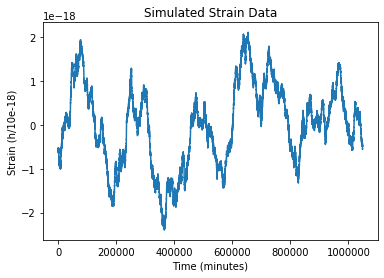

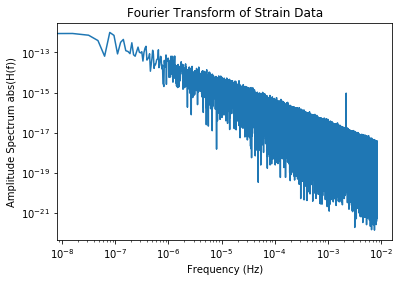

In [9]:
'''
ASTP-720, Fall 2020
Homework 8
Zach Diermyer
Problem 1
'''

import numpy as np
import matplotlib.pyplot as plt

def CooleyTukey(data):
    '''
    Uses the Cooley-Tukey algorithm to find the FFT of input data
    Inputs:
        data - Array of data values
    Returns:
        DFT - The Discreet Fourier Transform of a small segment of data after recursion
    '''
    data = np.asarray(data, dtype=float)
    N = data.shape[0]
    if N % 2 > 0:
        raise ValueError("size of data must be a power of 2")
    elif N <= 32:
        return(DFT(data))
    else:
        X_even = CooleyTukey(data[::2])
        X_odd = CooleyTukey(data[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(np.round(N/2))] * X_odd,\
                               X_even + factor[int(np.round(N/2)):] * X_odd])
                                                                                            
def DFT(x):
    '''
    Finds the Discreet Fourier Transform of an input array
    Inputs:
        x - Array to find DFT of
    Returns:
        np.dot(M, x) - Dot product (sum) of w coefficients multiplied with array values
    '''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    w = np.exp(-2j * np.pi * k * n / N)
    return np.dot(w, x)

def FindRadius(fgw, h, D):
    '''
    Finds the separation radius of a white dwarf system using the equations for gravitational
    wave frequency and strain.
    Inputs:
        fgw - Gravitational wave frequency in Hz
        h - Strain amplitude; dimensionless
        D - Distance to binary in parsecs
    Returns:
        rAU - Approximate binary separation in AU
    '''
    r = (fgw**2/((3.8*(10**12))*h*D))**(-3/5)
    rAU = r/215
    return(rAU)

def FindMass(h, R, D):
    '''
    Finds the total white dwarf binary mass using the equation of gravitational wave strain
    Inputs:
        h - Strain amplitude; dimensionless
        R - Binary separation in solar radii
        D - Distance to binary in parsecs
    Returns:
        M - Total binary mass in solar masses
    '''
    coeff = h/(2.6*(10**(-21)))
    M = (coeff*D*R)**(1/2)
    return(M)

def main():
    data = np.load('strain.npy')
    plt.figure(1)
    plt.plot(data)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Strain (h/10e-18)")
    plt.title("Simulated Strain Data")
    T = len(data)
    t = np.arange(T)*60
    L = len(t)                                              #Time Axis
    Ts = t[1] - t[0]                                        #Sampling Interval Lengths
    Fs = 1/Ts                                               #Sampling Frequency
    Fn = Fs/2                                               #Corrected Frequency
    FTs = CooleyTukey(data)/L                               #Fourier Transform
    Fv = np.linspace(0, 1, np.round(L/2)+1)*Fn              #Frequency Axis
    FTs_plot = []
    mag = []
    for i in range(len(Fv)-1):
        mag.append(abs(FTs[i]))                             #Fourier Transform Magnitudes
    peak = max(mag)
    for i in range(len(Fv)-1):
        FTs_plot.append(((mag[i])/peak)*10**(-12))          #Normalised Fourier Transform (with manual offset)
    plt.figure(2)
    plt.plot(Fv[0:-1], FTs_plot)
    plt.title('Fourier Transform of Strain Data')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude Spectrum abs(H(f))')
    plt.yscale('log')
    plt.xscale('log')
    amp = max(FTs_plot[102000:])
    for i in range(len(FTs_plot)):
        if FTs_plot[i] == amp:
            right = FTs_plot[i+1]
            freqind = i
            left = FTs_plot[i-1]
    av = (right + left)/2
    strain = amp - av
    print('Gravitational Wave Strain: ' + str(strain))
    freq = Fv[freqind]
    print('Gravitational Wave Frequency: ' + str(freq) + ' Hz')
    rad = FindRadius(fgw = freq, h = strain, D = 12)
    print('Separation Radius: ' + str(rad) + ' AU')
    M = FindMass(h = strain, R = rad*215, D = 12)
    print('Total Binary Mass: ' + str(M) + ' Solar Masses')
    
main()